In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('features_49.csv')

In [4]:
data27 = pd.read_csv('features_27.csv')

In [5]:
data16 = pd.read_csv('features_16.csv')

In [6]:
data11 = pd.read_csv('features_11.csv')

In [7]:
#Taking data of 49 features
#RF
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
data.shape

(11430, 52)

In [9]:
data.describe()

,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,...,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,brand_in_subdomain,suspecious_tld
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,...,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.004112,0.017935
std,55.297318,10.777171,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,...,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.063996,0.132722
min,12.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.000000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,3.000000,0.000000,9.000000,7.000000,0.000000,5.250000,5.250000,0.000000,0.000000,0.000000
50%,47.000000,19.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,3.000000,2.000000,11.000000,10.000000,7.000000,6.500000,7.000000,4.857143,0.000000,0.000000
75%,71.000000,24.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,6.000000,3.000000,16.000000,13.000000,11.000000,8.000000,9.000000,6.714286,0.000000,0.000000
max,1641.000000,214.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,18.000000,...,39.000000,40.000000,829.000000,62.000000,829.000000,128.250000,39.000000,250.000000,1.000000,1.000000


In [10]:
pd.set_option('display.max_rows', 500)
data.isna().sum()

url                   0
length_url            0
length_hostname       0
nb_dots               0
nb_hyphens            0
nb_at                 0
nb_qm                 0
nb_and                0
nb_or                 0
nb_eq                 0
nb_underscore         0
nb_tilde              0
nb_percent            0
nb_slash              0
nb_star               0
nb_colon              0
nb_comma              0
nb_semicolumn         0
nb_dollar             0
nb_space              0
nb_www                0
nb_com                0
nb_dslash             0
http_in_path          0
https_token           0
ratio_digits_url      0
ratio_digits_host     0
punycode              0
port                  0
tld_in_path           0
tld_in_subdomain      0
abnormal_subdomain    0
nb_subdomains         0
prefix_suffix         0
random_domain         0
shortening_service    0
path_extension        0
nb_redirection        0
length_words_raw      0
char_repeat           0
shortest_words_raw    0
shortest_word_ho

In [11]:
pd.reset_option('display.max_rows')

In [12]:
original_dataset = data.copy()

In [13]:
class_map = {'legitimate':0, 'phishing':1}
original_dataset['status'] = original_dataset['status'].map(class_map)

In [14]:
corr_matrix = original_dataset.corr()


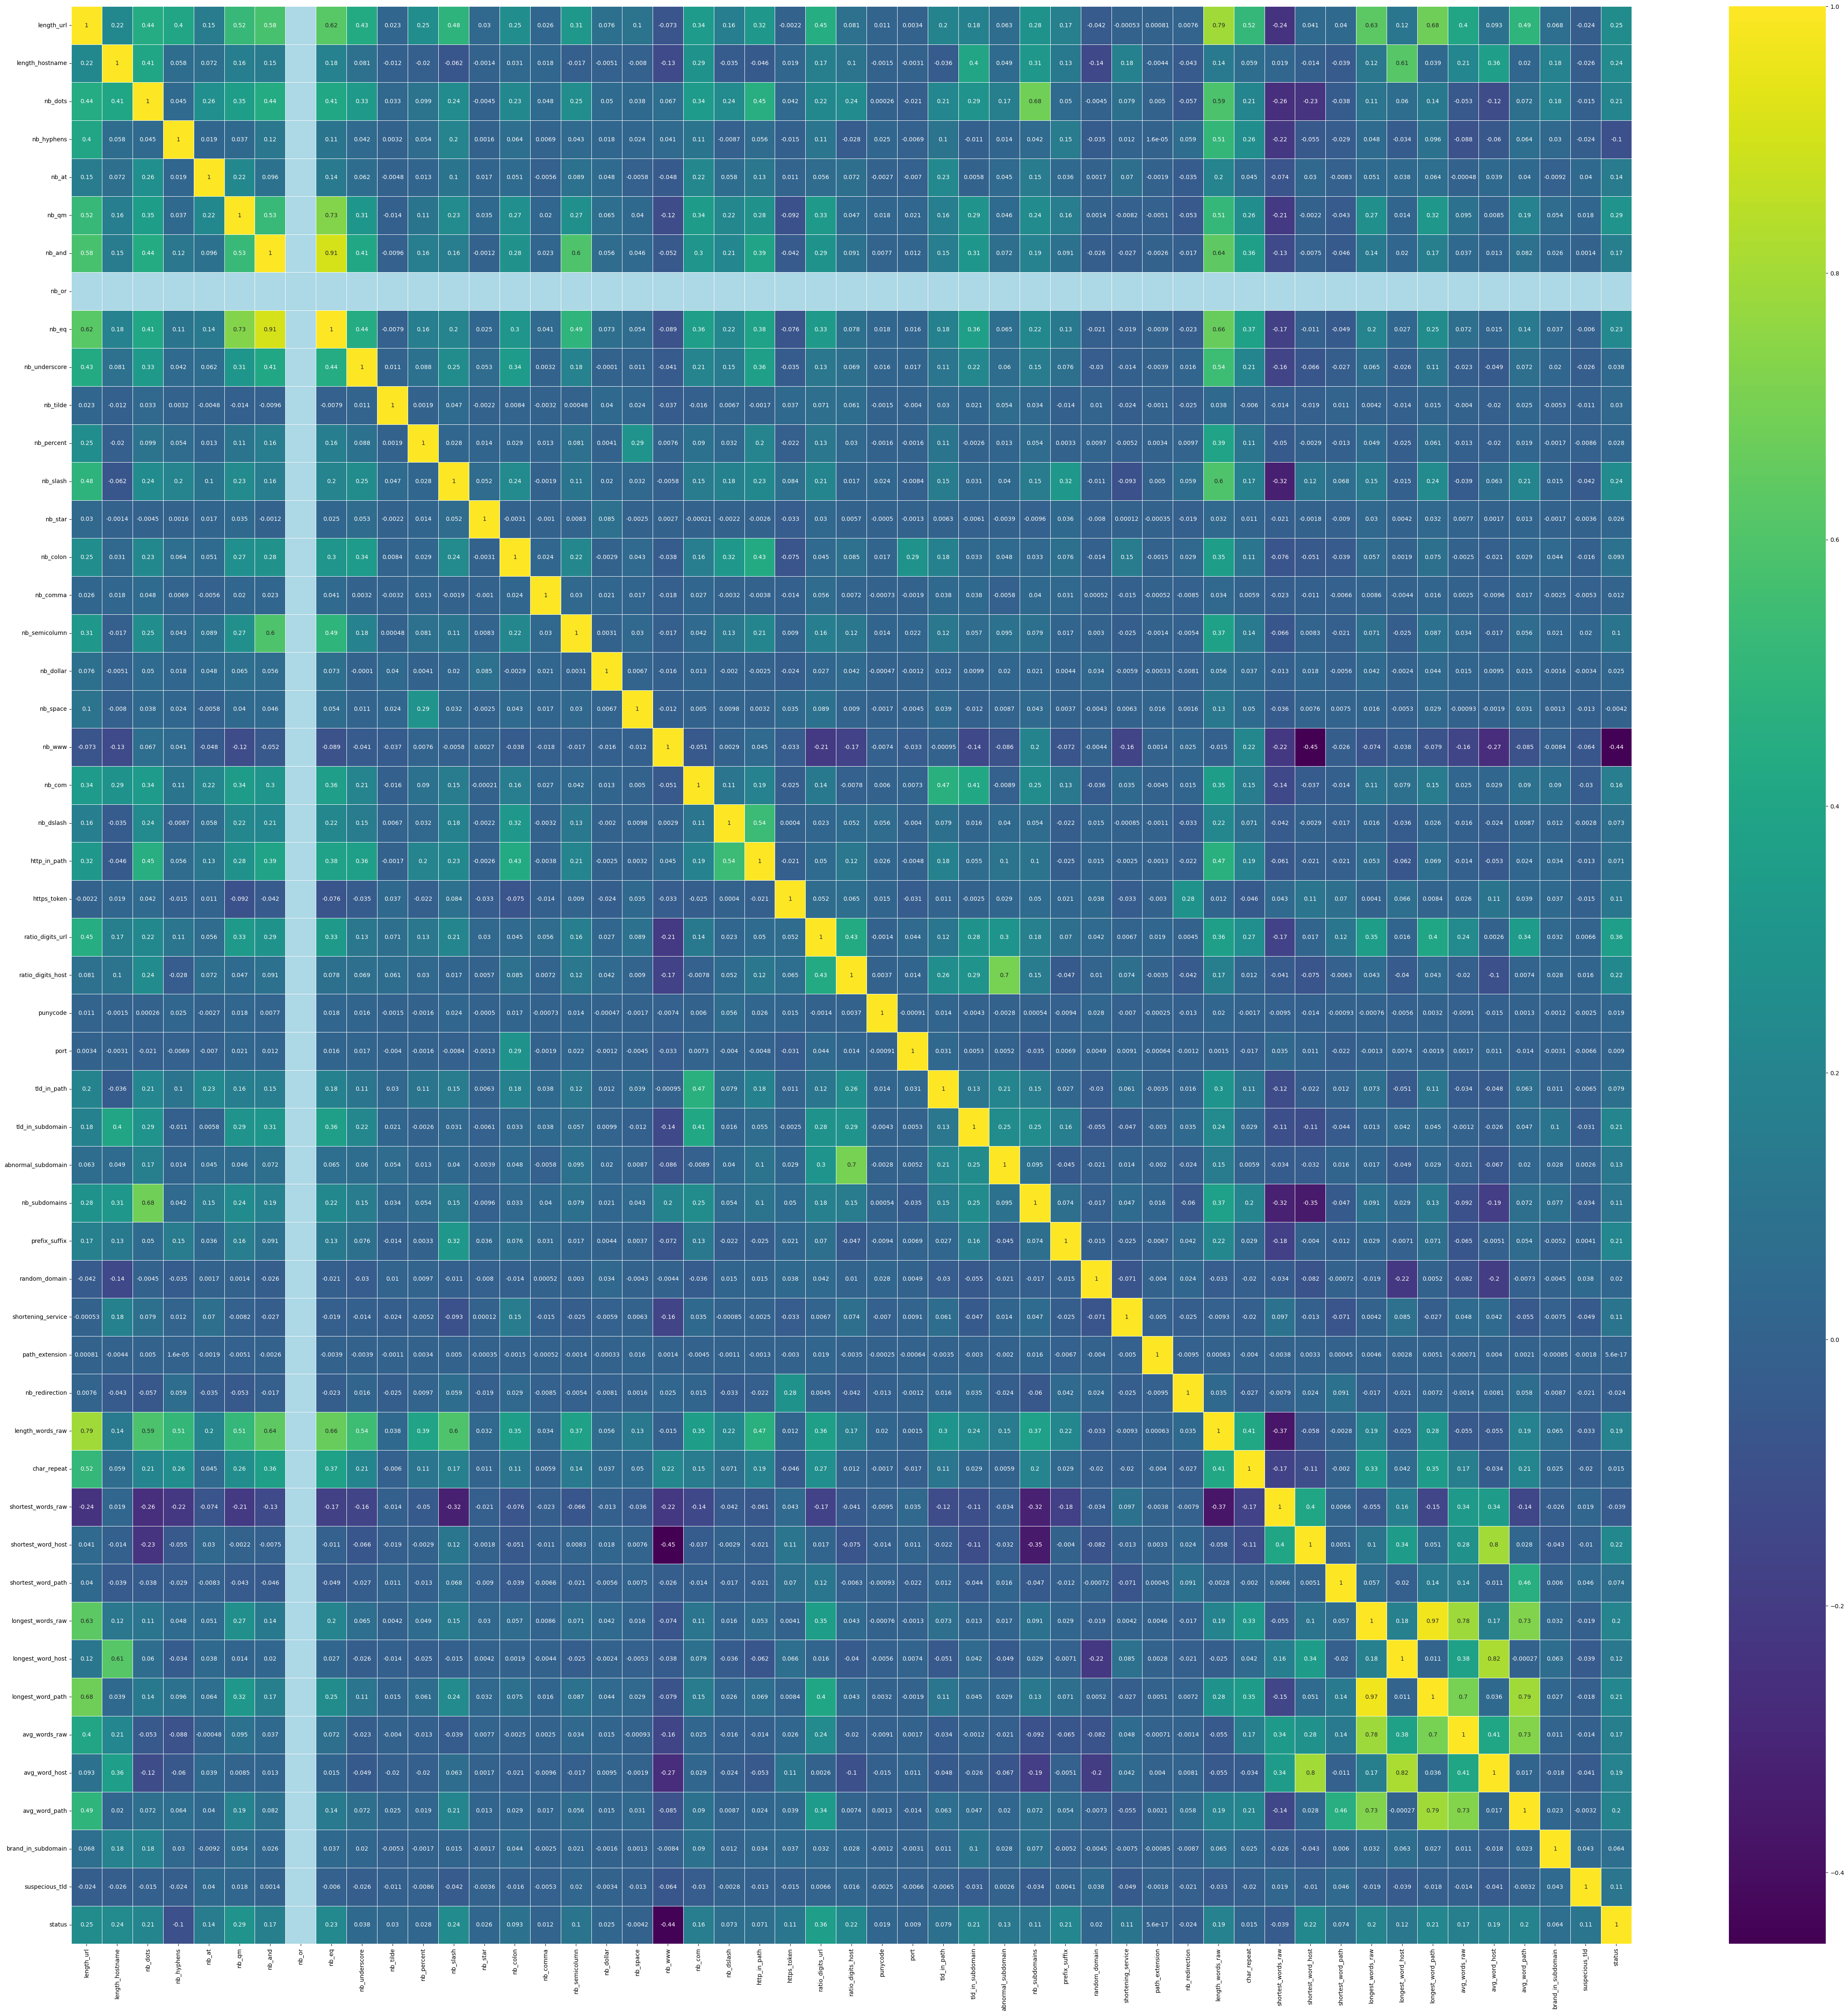

In [15]:
plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()


In [16]:
corr_matrix.shape

(51, 51)

In [17]:
corr_matrix['status']

length_url            2.485805e-01
length_hostname       2.383224e-01
nb_dots               2.070288e-01
nb_hyphens           -1.001075e-01
nb_at                 1.429146e-01
nb_qm                 2.943191e-01
nb_and                1.705464e-01
nb_or                          NaN
nb_eq                 2.333863e-01
nb_underscore         3.809134e-02
nb_tilde              3.014233e-02
nb_percent            2.810129e-02
nb_slash              2.422700e-01
nb_star               2.646512e-02
nb_colon              9.283531e-02
nb_comma              1.186465e-02
nb_semicolumn         1.035541e-01
nb_dollar             2.496206e-02
nb_space             -4.193222e-03
nb_www               -4.434677e-01
nb_com                1.562835e-01
nb_dslash             7.260234e-02
http_in_path          7.077624e-02
https_token           1.146691e-01
ratio_digits_url      3.563946e-01
ratio_digits_host     2.243349e-01
punycode              1.871039e-02
port                  9.011116e-03
tld_in_path         

In [18]:
status_corr = corr_matrix['status']
status_corr.shape


(51,)

In [19]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [20]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected

[('length_url', ['0.248580']),
 ('length_hostname', ['0.238322']),
 ('nb_dots', ['0.207029']),
 ('nb_qm', ['0.294319']),
 ('nb_eq', ['0.233386']),
 ('nb_slash', ['0.242270']),
 ('nb_www', ['-0.443468']),
 ('ratio_digits_url', ['0.356395']),
 ('ratio_digits_host', ['0.224335']),
 ('tld_in_subdomain', ['0.208884']),
 ('prefix_suffix', ['0.214681']),
 ('shortest_word_host', ['0.223084']),
 ('longest_words_raw', ['0.200147']),
 ('longest_word_path', ['0.212709']),
 ('status', ['1.000000'])]

In [21]:
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features


['length_url',
 'length_hostname',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path']

In [22]:
X_selected = original_dataset[selected_features]
X_selected

,length_url,length_hostname,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,tld_in_subdomain,prefix_suffix,shortest_word_host,longest_words_raw,longest_word_path
0,37,19,3,0,0,3,1,0.000000,0.000000,0,0,3,11,6
1,77,23,1,0,0,5,0,0.220779,0.000000,0,0,19,32,32
2,126,50,4,1,3,5,0,0.150794,0.000000,1,1,3,17,17
3,18,11,2,0,0,2,0,0.000000,0.000000,0,0,5,5,0
4,55,15,2,0,0,5,1,0.000000,0.000000,0,0,3,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,2,0,0,4,1,0.000000,0.000000,0,0,3,11,11
11426,84,18,5,1,1,5,1,0.023810,0.000000,0,0,3,10,8
11427,105,16,2,1,1,5,1,0.142857,0.000000,0,0,3,15,15
11428,38,30,2,0,0,3,1,0.000000,0.000000,0,0,3,22,0


In [23]:
X_selected.shape

(11430, 14)

In [24]:
X_selected.shape

(11430, 14)

In [25]:
y = original_dataset['status']
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_random_forest = RandomForestClassifier(n_estimators=350,
                                             random_state=42,
                                             )

In [30]:
model_random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

In [31]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [34]:
def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    
    
    if train:
        x = X_train
        y = y_train
    elif not train:
        x = X_test
        y = y_test
        
    y_predicted = model.predict(x)
    
    accuracy = accuracy_score(y, y_predicted)
    print('model accuracy: {0:4f}'.format(accuracy))
    oconfusion_matrix = confusion_matrix(y, y_predicted)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    oroc_auc_score = lb.transform(y), lb.transform(y_predicted)


In [35]:
custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=True)


model accuracy: 0.989501
Confusion matrix: 
 [[4515   43]
 [  53 4533]]


In [36]:
custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=False)

model accuracy: 0.875328
Confusion matrix: 
 [[1023  134]
 [ 151  978]]


In [37]:
#MLP

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score
from sklearn.feature_selection import SelectPercentile , chi2 , f_classif
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [38]:
X = data.copy()

In [39]:
Y = data["status"]
# Y = Y == "legitimate"
X.drop(["status" , "url"] , axis=1 , inplace=True)
# print(X.columns)
Cols = X.columns;
# print(X.shape , Y.shape)
Y = Y == "legitimate"


In [40]:
Scaler = StandardScaler(copy=True , with_mean=True , with_std=True)
X = Scaler.fit_transform(X)


In [41]:
SP = SelectPercentile(score_func=f_classif , percentile=60)

In [42]:
X = SP.fit_transform(X , Y)

C:\Users\18145\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\18145\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [43]:
print("Number Of Features : " , Cols[SP.get_support()])

Number Of Features :  Index(['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_eq', 'nb_slash', 'nb_colon', 'nb_semicolumn',
       'nb_www', 'nb_com', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'shortening_service',
       'length_words_raw', 'shortest_word_host', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'suspecious_tld'],
      dtype='object')


In [44]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.20 , random_state=10 , shuffle=True)

In [45]:
Model = MLPClassifier(solver='adam' , alpha=0.01 , hidden_layer_sizes=(100 , 100 , 100 , 100) , max_iter=100 , random_state=44)
Ans1 = Model.fit(x_train , y_train)
print("Score Model For Training Data : " , Model.score(x_train , y_train))

Score Model For Training Data :  0.9698162729658792


In [46]:
YPred = Ans1.predict(x_test)
conf_matrix = confusion_matrix(y_test ,YPred)
print("Confusion Matrix of the Test Set")
print("-----------")
print(conf_matrix)
print("Precision of the MLP :\t"+str(precision_score(y_test,YPred)))
print("Recall of the MLP    :\t"+str(recall_score(y_test,YPred)))
print("F1 Score of the MLP :\t"+str(f1_score(y_test,YPred)))
print("Accuracy Score of the MLP :\t"+str(accuracy_score(y_test,YPred)))


Confusion Matrix of the Test Set
-----------
[[1010  124]
 [ 141 1011]]
Precision of the MLP :	0.8907488986784141
Recall of the MLP    :	0.8776041666666666
F1 Score of the MLP :	0.8841276781810231
Accuracy Score of the MLP :	0.884076990376203


In [47]:
#XGBOOST
import numpy as np 
import pandas as pd 
import os



In [48]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import balanced_accuracy_score
from xgboost import XGBRegressor
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [50]:
data.columns


Index(['url', 'length_url', 'length_hostname', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'brand_in_subdomain',
       'suspecious_tld', 'status'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
y = data.status
X = data.drop(['status'], axis=1)

In [53]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [54]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]


numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


In [55]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [56]:
numerical_transformer = SimpleImputer(strategy='constant')

In [57]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [59]:
print(data.describe)


<bound method NDFrame.describe of                                                      url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
1      http://shadetreetechnology.com/V4/validation/a...          77   
2      https://support-appleld.com.secureupdate.duila...         126   
3                                     http://rgipt.ac.in          18   
4      http://www.iracing.com/tracks/gateway-motorspo...          55   
...                                                  ...         ...   
11425      http://www.fontspace.com/category/blackletter          45   
11426  http://www.budgetbots.com/server.php/Server%20...          84   
11427  https://www.facebook.com/Interactive-Televisio...         105   
11428             http://www.mypublicdomainpictures.com/          38   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   19   

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [61]:
y_valid = le.fit_transform(y_valid)

In [62]:
print(y_train)

[0 1 0 ... 1 1 1]


In [63]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [64]:
model = xgb.XGBClassifier()

In [65]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [66]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['length_url',
                                                   'length_hostname', 'nb_dots',
                                                   'nb_hyphens', 'nb_at',
                                                   'nb_qm', 'nb_and', 'nb_or',
                                                   'nb_eq', 'nb_underscore',
                                                   'nb_tilde', 'nb_percent',
                                                   'nb_slash', 'nb_star',
                                                   'nb_colon', 'nb_comma',
                                                   'nb_semicolumn', 'nb_dollar',
                                                   'nb_space', 'nb_www',
                                                   'nb_com', 'nb_dsl

In [67]:
preds = my_pipeline.predict(X_valid)
print(accuracy_score(preds,y_valid))

0.9168853893263342


In [68]:
#Gausian Naive Bayes method

import numpy as np
import pandas as pd 

import os
import pickle
import numpy as np
import pandas as pd
import sklearn
from sklearn.naive_bayes import GaussianNB #model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import time

In [69]:
start = time.time()

In [70]:
removeCols = ['url', 'status']
featuresCol = [i for i in data.columns if i not in removeCols]
StatusCol = 'status'
data[StatusCol] = data[StatusCol]
features, targets = data[featuresCol], data[StatusCol]

In [71]:
class Scaler():
    
    def __init__(self, scaler, feature_range=None):
        self.columns = None
        self.index = None
        self.feature_range = feature_range
        self.scaler = scaler()
        if (isinstance(self.scaler, sklearn.preprocessing._data.MinMaxScaler)
            and isinstance(self.feature_range, tuple)):
            self.scaler = scaler(feature_range = self.feature_range)
        
    def fit(self, X):
        self.scaler = self.scaler.fit(X)
        return self
                
    def transform(self, X):
        scaled_X = self.scaler.transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            scaled_X = pd.DataFrame(scaled_X, index=self.index, columns=self.columns)
        return scaled_X
    
    def inverse_transform(self, X):
        inversed_X = self.scaler.inverse_transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            inversed_X = pd.DataFrame(inversed_X, index=self.index, columns=self.columns)
        return inversed_X



train_size = 0.85 
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, shuffle=True, train_size=train_size,
    random_state=42)

In [72]:
scaler = Scaler(StandardScaler) 
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [73]:
naive_bayes = GaussianNB() #call model
naive_bayes = naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_train)
print(f'\nTraining Accuracy: {round(accuracy_score(y_train, pred)*100, 4)}%')



Training Accuracy: 64.5188%


In [74]:
X_test = scaler.transform(X_test)
pred = naive_bayes.predict(X_test)

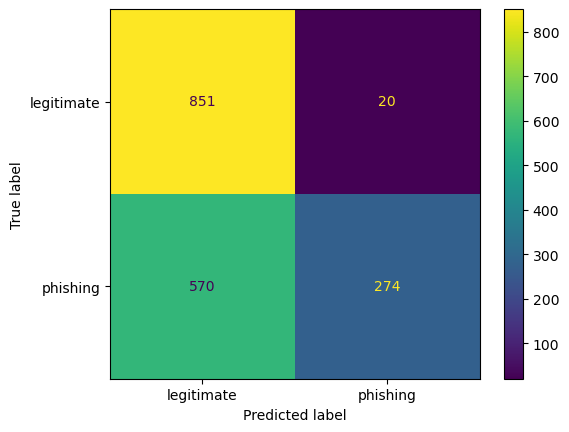

In [75]:
cm = confusion_matrix(y_test, pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
display_cm.plot()
plt.show()


In [76]:
print(f'Accuracy: {round(accuracy_score(y_test, pred)*100, 4)}%')
end = time.time()
finalTime = end - start
print("Total time (in seconds): " + str(finalTime))


Accuracy: 65.5977%
Total time (in seconds): 108.5843448638916


In [77]:
#Taking Data27 0f 27features
#RF
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [78]:
data27.describe()

,avg_word_host,domain_in_brand,brand_in_path,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,...,ratio_extMedia,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,sfh
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.0
mean,7.678075,0.104199,0.004899,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,...,23.236293,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.0
std,3.578435,0.305533,0.069827,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,...,38.386577,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,5.250000,0.000000,0.000000,9.000000,0.224991,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.0
50%,7.000000,0.000000,0.000000,34.000000,0.743442,0.131148,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,23.294574,0.000000,0.00000,0.000000,1.000000,0.000000,0.0
75%,9.000000,0.000000,0.000000,101.000000,0.944767,0.474840,0.0,1.000000,0.0,0.230769,...,33.333333,0.000000,0.000000,75.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.0
max,39.000000,1.000000,1.000000,4659.000000,1.000000,1.000000,0.0,124.000000,0.0,2.000000,...,100.000000,1.000000,1.000000,100.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0


In [79]:
pd.set_option('display.max_rows', 500)
data27.isna().sum()


url                      0
avg_word_host            0
domain_in_brand          0
brand_in_path            0
nb_hyperlinks            0
ratio_intHyperlinks      0
ratio_extHyperlinks      0
ratio_nullHyperlinks     0
nb_extCSS                0
ratio_intRedirection     0
ratio_extRedirection     0
ratio_intErrors          0
ratio_extErrors          0
login_form               0
external_favicon         0
links_in_tags            0
submit_email             0
ratio_intMedia           0
ratio_extMedia           0
iframe                   0
popup_window             0
safe_anchor              0
onmouseover              0
right_clic               0
empty_title              0
domain_in_title          0
domain_with_copyright    0
sfh                      0
status                   0
dtype: int64

In [80]:
pd.reset_option('display.max_rows')


In [81]:
original_dataset = data27.copy()

In [82]:
class_map = {'legitimate':0, 'phishing':1}
original_dataset['status'] = original_dataset['status'].map(class_map)


In [83]:
corr_matrix = original_dataset.corr()

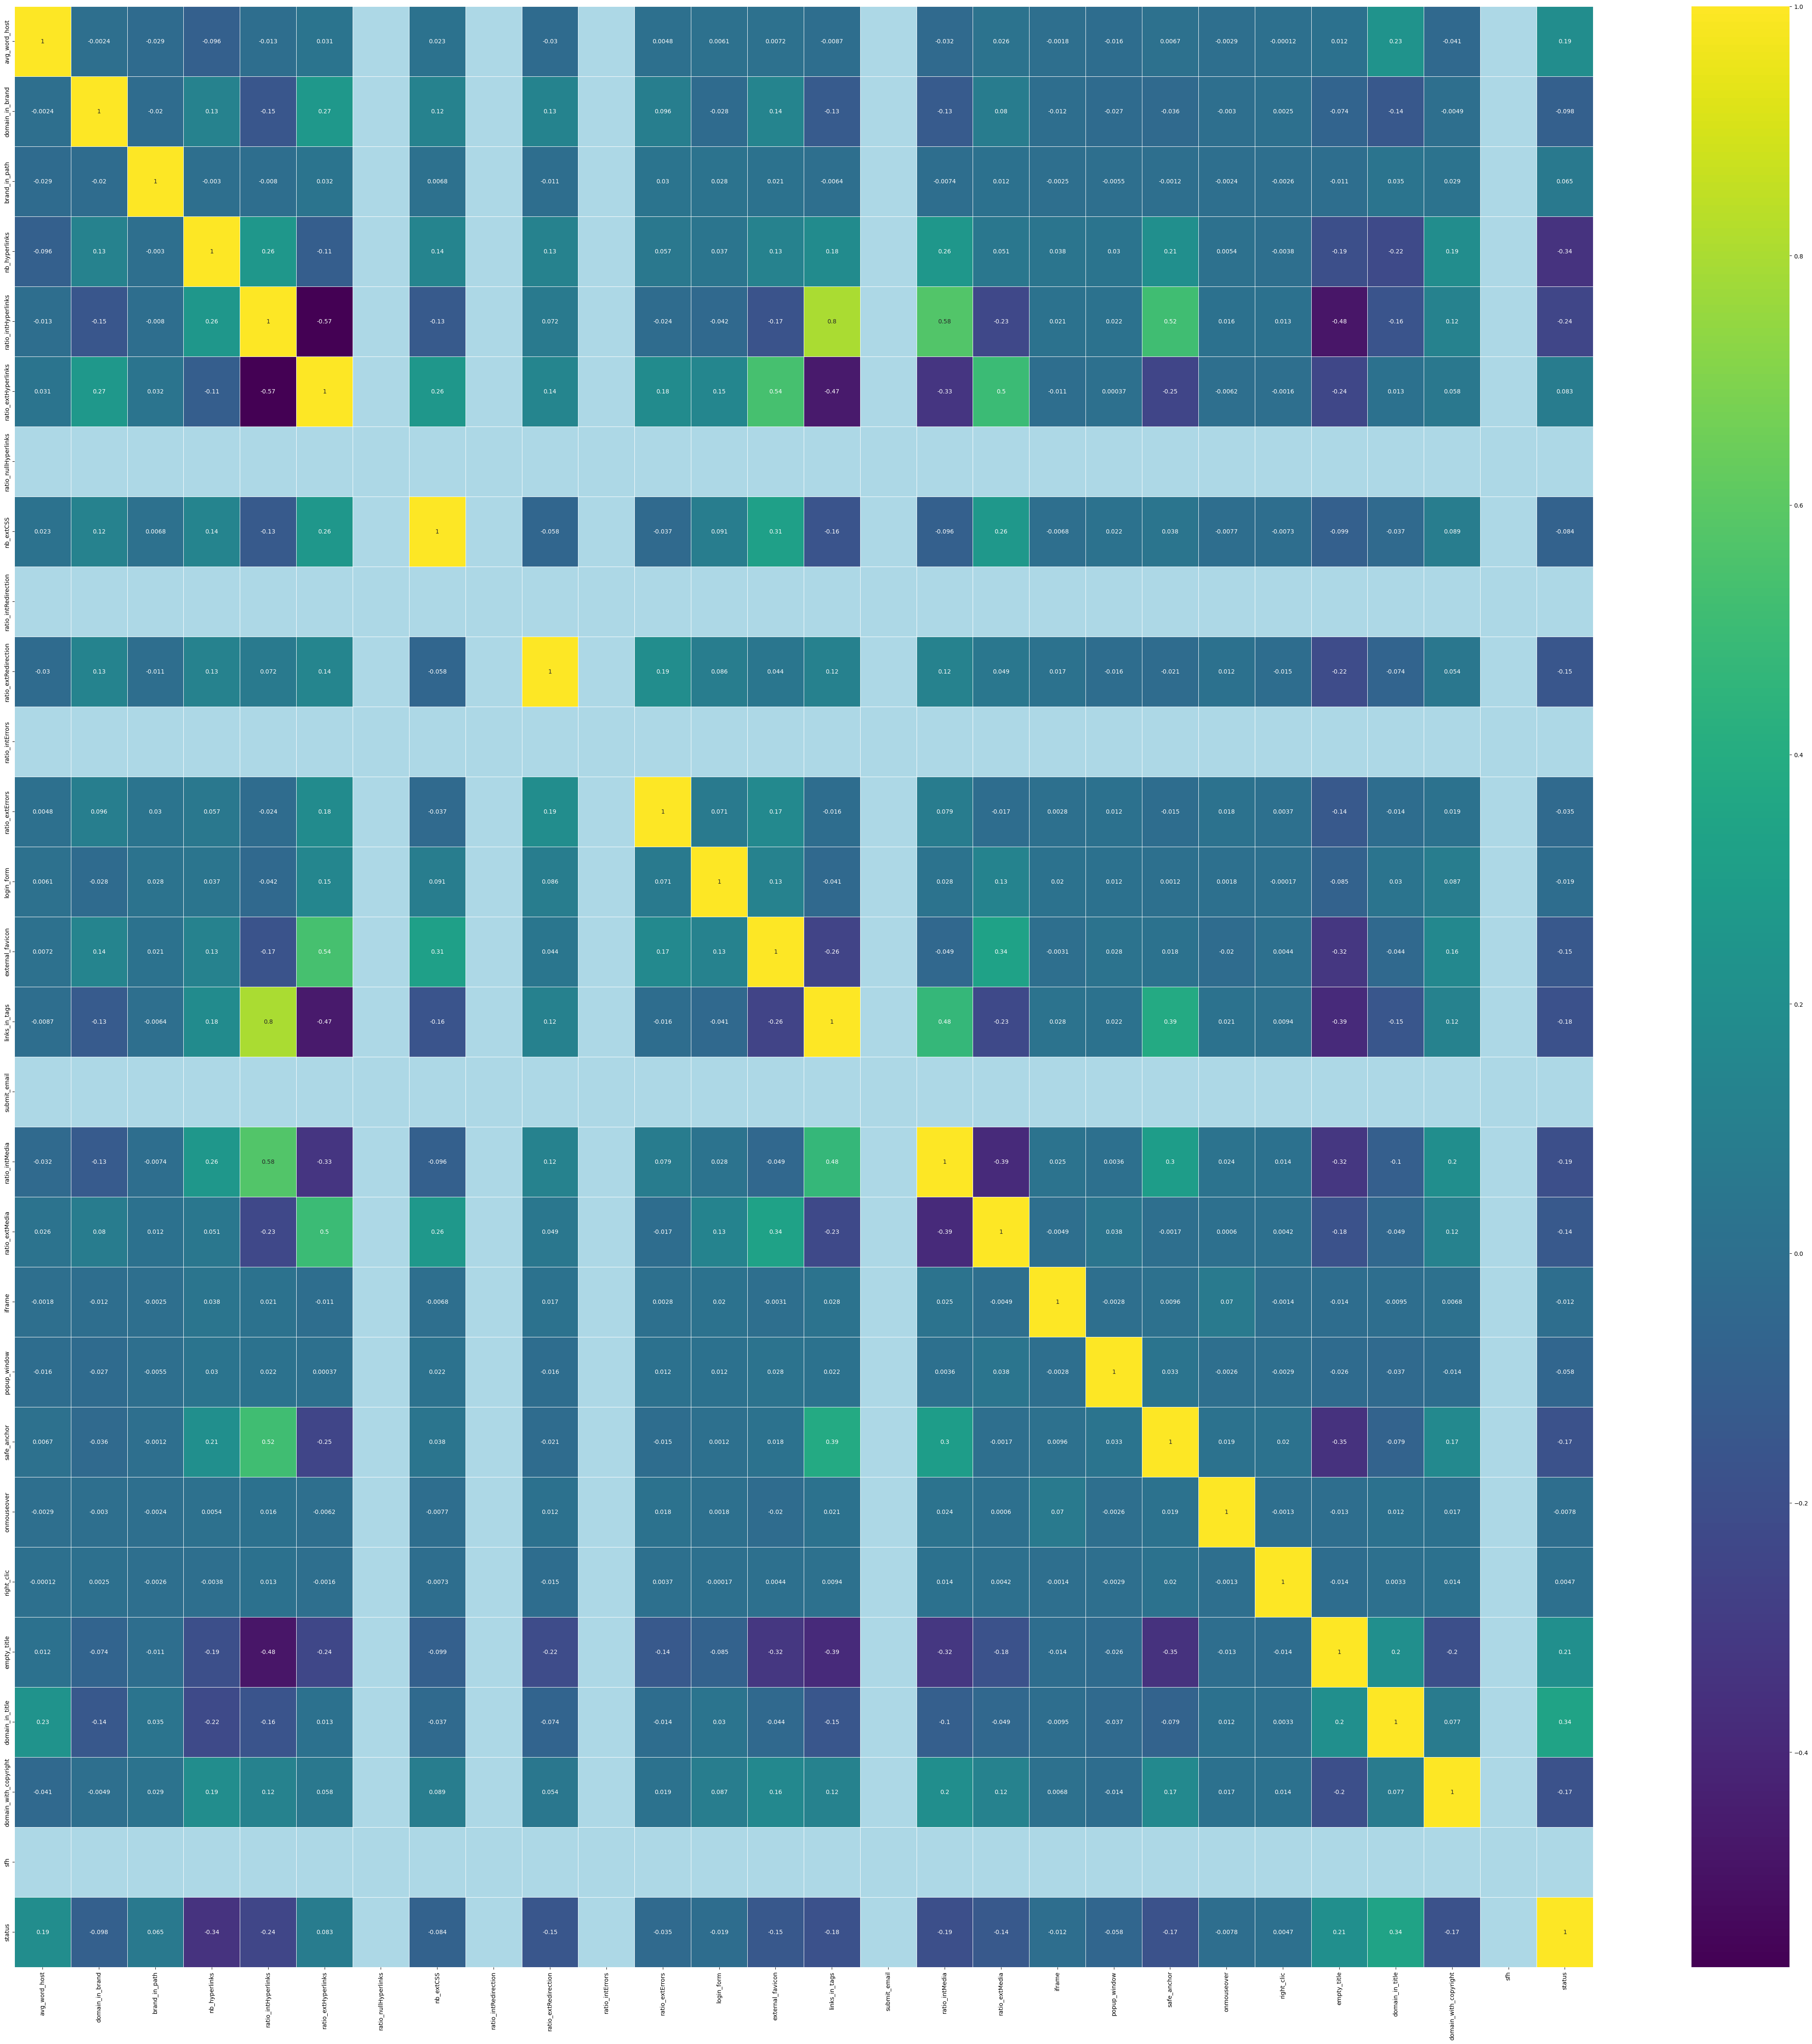

In [84]:
plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()

In [85]:
corr_matrix.shape

(28, 28)

In [86]:
corr_matrix['status']

avg_word_host            0.193502
domain_in_brand         -0.098222
brand_in_path            0.065156
nb_hyperlinks           -0.342628
ratio_intHyperlinks     -0.243982
ratio_extHyperlinks      0.083357
ratio_nullHyperlinks          NaN
nb_extCSS               -0.083567
ratio_intRedirection          NaN
ratio_extRedirection    -0.150827
ratio_intErrors               NaN
ratio_extErrors         -0.034703
login_form              -0.019000
external_favicon        -0.146565
links_in_tags           -0.184401
submit_email                  NaN
ratio_intMedia          -0.193333
ratio_extMedia          -0.140406
iframe                  -0.012083
popup_window            -0.057602
safe_anchor             -0.173397
onmouseover             -0.007787
right_clic               0.004680
empty_title              0.207043
domain_in_title          0.342807
domain_with_copyright   -0.173098
sfh                           NaN
status                   1.000000
Name: status, dtype: float64

In [87]:
status_corr = corr_matrix['status']
status_corr.shape

(28,)

In [88]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [89]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected


[('nb_hyperlinks', ['-0.342628']),
 ('ratio_intHyperlinks', ['-0.243982']),
 ('empty_title', ['0.207043']),
 ('domain_in_title', ['0.342807']),
 ('status', ['1.000000'])]

In [90]:
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features

['nb_hyperlinks', 'ratio_intHyperlinks', 'empty_title', 'domain_in_title']

In [91]:
X_selected = original_dataset[selected_features]
X_selected

,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title
0,17,0.529412,0,0
1,30,0.966667,0,1
2,4,1.000000,0,1
3,149,0.973154,0,1
4,102,0.470588,0,0
...,...,...,...,...
11425,199,0.884422,0,0
11426,3,1.000000,0,1
11427,68,0.470588,0,0
11428,32,0.375000,0,1


In [92]:
X_selected.shape

(11430, 4)

In [93]:
y = original_dataset['status']
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
model_random_forest = RandomForestClassifier(n_estimators=350,
                                             random_state=42,
                                             )

In [98]:
model_random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

In [99]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [100]:
def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    
    
    if train:
        x = X_train
        y = y_train
    elif not train:
        x = X_test
        y = y_test
        
    y_predicted = model.predict(x)
    
    accuracy = accuracy_score(y, y_predicted)
    print('model accuracy: {0:4f}'.format(accuracy))
    oconfusion_matrix = confusion_matrix(y, y_predicted)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    oroc_auc_score = lb.transform(y), lb.transform(y_predicted)		


In [101]:
custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=True)


model accuracy: 0.917979
Confusion matrix: 
 [[3961  597]
 [ 153 4433]]


In [102]:
custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=False)

model accuracy: 0.831146
Confusion matrix: 
 [[920 237]
 [149 980]]


In [103]:
#MLP

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score
from sklearn.feature_selection import SelectPercentile , chi2 , f_classif
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


In [104]:
X = data27.copy()
# data.head()
Y = data["status"]
# Y = Y == "legitimate"
X.drop(["status" , "url"] , axis=1 , inplace=True)
# print(X.columns)
Cols = X.columns;
# print(X.shape , Y.shape)
Y = Y == "legitimate"

In [105]:
Scaler = StandardScaler(copy=True , with_mean=True , with_std=True)
X = Scaler.fit_transform(X)

In [106]:
SP = SelectPercentile(score_func=f_classif , percentile=60)


In [107]:
X = SP.fit_transform(X , Y)

C:\Users\18145\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6  8 10 15 26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\18145\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [108]:
print("Number Of Features : " , Cols[SP.get_support()])

Number Of Features :  Index(['avg_word_host', 'domain_in_brand', 'brand_in_path', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extHyperlinks', 'nb_extCSS',
       'ratio_extRedirection', 'external_favicon', 'links_in_tags',
       'ratio_intMedia', 'ratio_extMedia', 'safe_anchor', 'empty_title',
       'domain_in_title', 'domain_with_copyright'],
      dtype='object')


In [109]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.20 , random_state=10 , shuffle=True)

In [110]:
Model = MLPClassifier(solver='adam' , alpha=0.01 , hidden_layer_sizes=(100 , 100 , 100 , 100) , max_iter=100 , random_state=44)
Ans1 = Model.fit(x_train , y_train)
print("Score Model For Training Data : " , Model.score(x_train , y_train))

Score Model For Training Data :  0.9647856517935258


C:\Users\18145\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [111]:
YPred = Ans1.predict(x_test)
conf_matrix = confusion_matrix(y_test ,YPred)
print("Confusion Matrix of the Test Set")
print("-----------")
print(conf_matrix)
print("Precision of the MLP :\t"+str(precision_score(y_test,YPred)))
print("Recall of the MLP    :\t"+str(recall_score(y_test,YPred)))
print("F1 Score of the MLP :\t"+str(f1_score(y_test,YPred)))
print("Accuracy Score of the MLP :\t"+str(accuracy_score(y_test,YPred)))


Confusion Matrix of the Test Set
-----------
[[1023  111]
 [ 174  978]]
Precision of the MLP :	0.8980716253443526
Recall of the MLP    :	0.8489583333333334
F1 Score of the MLP :	0.8728246318607764
Accuracy Score of the MLP :	0.8753280839895013


In [112]:
#XGBoost
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [113]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [114]:
import pandas as pd


In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import balanced_accuracy_score
from xgboost import XGBRegressor
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [116]:
data27.columns


Index(['url', 'avg_word_host', 'domain_in_brand', 'brand_in_path',
       'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks',
       'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intRedirection',
       'ratio_extRedirection', 'ratio_intErrors', 'ratio_extErrors',
       'login_form', 'external_favicon', 'links_in_tags', 'submit_email',
       'ratio_intMedia', 'ratio_extMedia', 'iframe', 'popup_window',
       'safe_anchor', 'onmouseover', 'right_clic', 'empty_title',
       'domain_in_title', 'domain_with_copyright', 'sfh', 'status'],
      dtype='object')

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
y = data27.status
X = data27.drop(['status'], axis=1)

In [119]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [120]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [121]:
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


In [122]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [123]:
numerical_transformer = SimpleImputer(strategy='constant')

In [124]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [125]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [126]:
print(data27.describe)

<bound method NDFrame.describe of                                                      url  avg_word_host  \
0                  http://www.crestonwood.com/router.php           7.00   
1      http://shadetreetechnology.com/V4/validation/a...          19.00   
2      https://support-appleld.com.secureupdate.duila...           8.40   
3                                     http://rgipt.ac.in           5.00   
4      http://www.iracing.com/tracks/gateway-motorspo...           5.00   
...                                                  ...            ...   
11425      http://www.fontspace.com/category/blackletter           6.00   
11426  http://www.budgetbots.com/server.php/Server%20...           6.50   
11427  https://www.facebook.com/Interactive-Televisio...           5.50   
11428             http://www.mypublicdomainpictures.com/          12.50   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...           2.75   

       domain_in_brand  brand_in_path  nb_hyperlinks  ratio_intHy

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [128]:
y_valid = le.fit_transform(y_valid)

In [129]:
print(y_train)

[0 1 0 ... 1 1 1]


In [130]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [131]:
model = xgb.XGBClassifier()

In [132]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])


In [133]:
my_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['avg_word_host',
                                                   'domain_in_brand',
                                                   'brand_in_path',
                                                   'nb_hyperlinks',
                                                   'ratio_intHyperlinks',
                                                   'ratio_extHyperlinks',
                                                   'ratio_nullHyperlinks',
                                                   'nb_extCSS',
                                                   'ratio_intRedirection',
                                                   'ratio_extRedirection',
                                                   'ratio_intErrors',
                                           

In [134]:
preds = my_pipeline.predict(X_valid)
print(accuracy_score(preds,y_valid))


0.9002624671916011


In [135]:
#Gaussian
import numpy as np
import pandas as pd 

import os
import pickle
import numpy as np
import pandas as pd
import sklearn
from sklearn.naive_bayes import GaussianNB #model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import time





In [136]:
start = time.time()

In [138]:
removeCols = ['url', 'status']
featuresCol = [i for i in data27.columns if i not in removeCols]
StatusCol = 'status'
data27[StatusCol] = data27[StatusCol]
features, targets = data27[featuresCol], data27[StatusCol]


In [139]:
class Scaler():
    
    def __init__(self, scaler, feature_range=None):
        self.columns = None
        self.index = None
        self.feature_range = feature_range
        self.scaler = scaler()
        if (isinstance(self.scaler, sklearn.preprocessing._data.MinMaxScaler)
            and isinstance(self.feature_range, tuple)):
            self.scaler = scaler(feature_range = self.feature_range)
        
    def fit(self, X):
        self.scaler = self.scaler.fit(X)
        return self
                
    def transform(self, X):
        scaled_X = self.scaler.transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            scaled_X = pd.DataFrame(scaled_X, index=self.index, columns=self.columns)
        return scaled_X
    
    def inverse_transform(self, X):
        inversed_X = self.scaler.inverse_transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            inversed_X = pd.DataFrame(inversed_X, index=self.index, columns=self.columns)
        return inversed_X



train_size = 0.85 
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, shuffle=True, train_size=train_size,
    random_state=42)

scaler = Scaler(StandardScaler) 
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)


In [140]:
naive_bayes = GaussianNB() #call model
naive_bayes = naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_train)
print(f'\nTraining Accuracy: {round(accuracy_score(y_train, pred)*100, 4)}%')



Training Accuracy: 76.737%


In [141]:
X_test = scaler.transform(X_test)
pred = naive_bayes.predict(X_test)

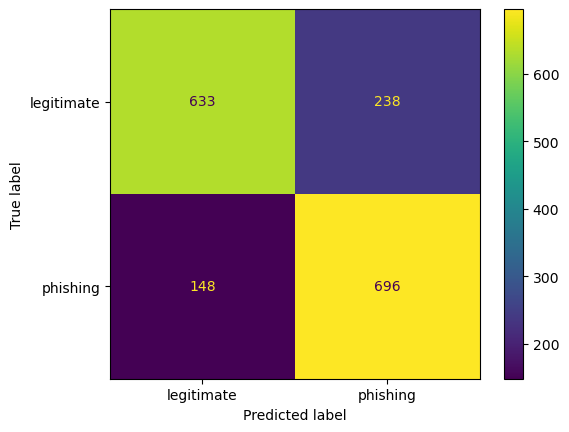

In [142]:
cm = confusion_matrix(y_test, pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
display_cm.plot()
plt.show()

In [143]:
print(f'Accuracy: {round(accuracy_score(y_test, pred)*100, 4)}%')
end = time.time()
finalTime = end - start
print("Total time (in seconds): " + str(finalTime))

Accuracy: 77.4927%
Total time (in seconds): 134.73211669921875


In [144]:
#Taking data11 of 11 features
#RF
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [145]:
data11.shape

(11430, 13)

In [146]:
data11.describe()

,ip,phish_hints,statistical_report,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,nb_external_redirection
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,0.150569,0.327734,0.059755,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.003150
std,0.357644,0.842600,0.331266,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.056035
min,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,0.000000
max,1.000000,10.000000,2.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [148]:
pd.set_option('display.max_rows', 500)
data11.isna().sum()

url                           0
ip                            0
phish_hints                   0
statistical_report            0
whois_registered_domain       0
domain_registration_length    0
domain_age                    0
web_traffic                   0
dns_record                    0
google_index                  0
page_rank                     0
nb_external_redirection       0
status                        0
dtype: int64

In [149]:
pd.reset_option('display.max_rows')

In [150]:
original_dataset = data11.copy()

In [151]:
class_map = {'legitimate':0, 'phishing':1}
original_dataset['status'] = original_dataset['status'].map(class_map)

In [152]:
corr_matrix = original_dataset.corr()

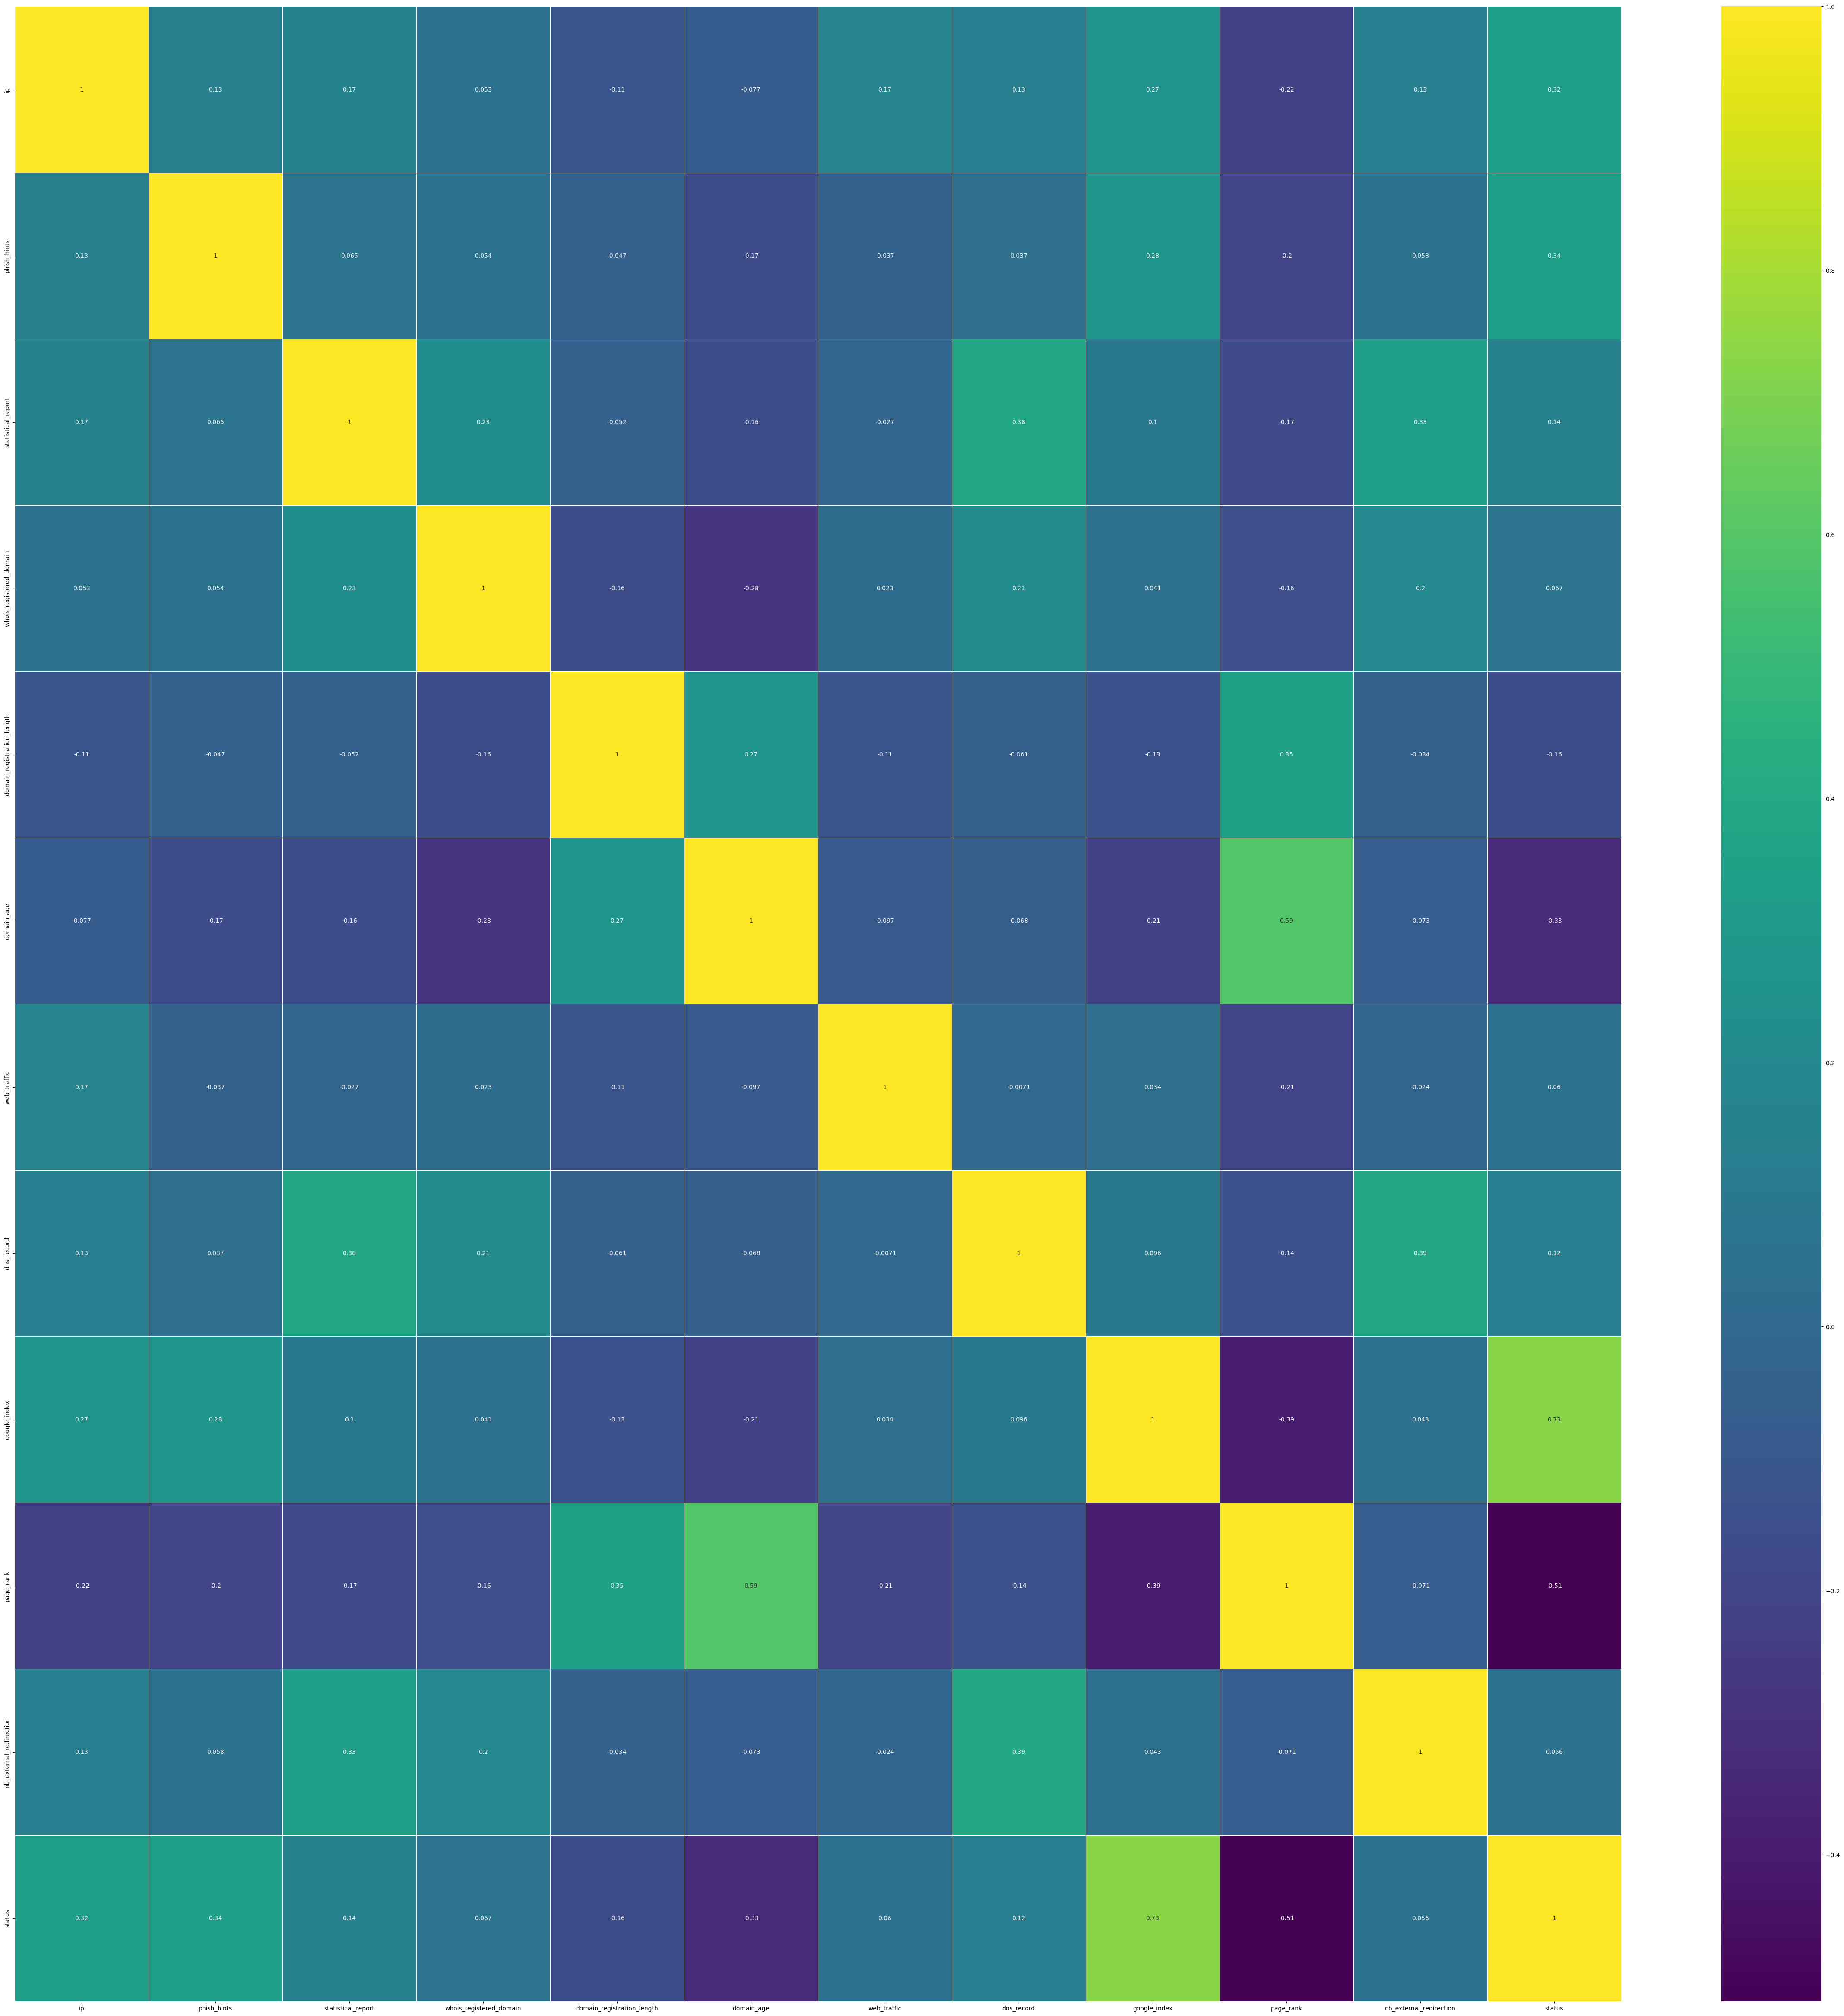

In [153]:
plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()


In [154]:
corr_matrix.shape

(12, 12)

In [155]:
corr_matrix['status']

ip                            0.321698
phish_hints                   0.335393
statistical_report            0.143944
whois_registered_domain       0.066979
domain_registration_length   -0.161719
domain_age                   -0.331889
web_traffic                   0.060388
dns_record                    0.122119
google_index                  0.731171
page_rank                    -0.511137
nb_external_redirection       0.056210
status                        1.000000
Name: status, dtype: float64

In [156]:
status_corr = corr_matrix['status']
status_corr.shape


(12,)

In [157]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [158]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected

[('ip', ['0.321698']),
 ('phish_hints', ['0.335393']),
 ('domain_age', ['-0.331889']),
 ('google_index', ['0.731171']),
 ('page_rank', ['-0.511137']),
 ('status', ['1.000000'])]

In [159]:
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features

['ip', 'phish_hints', 'domain_age', 'google_index', 'page_rank']

In [160]:
X_selected = original_dataset[selected_features]
X_selected


,ip,phish_hints,domain_age,google_index,page_rank
0,0,0,-1,1,4
1,1,0,5767,1,2
2,1,0,4004,1,0
3,0,0,-1,0,3
4,0,0,8175,0,6
...,...,...,...,...,...
11425,0,0,5396,0,6
11426,0,0,6728,1,0
11427,1,0,8515,1,10
11428,0,0,2836,0,4


In [161]:
X_selected.shape

(11430, 5)

In [162]:
y = original_dataset['status']
y


0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
model_random_forest = RandomForestClassifier(n_estimators=350,
                                             random_state=42,
                                             )

In [167]:
model_random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

In [168]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [169]:
def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    
    
    if train:
        x = X_train
        y = y_train
    elif not train:
        x = X_test
        y = y_test
        
    y_predicted = model.predict(x)
    
    accuracy = accuracy_score(y, y_predicted)
    print('model accuracy: {0:4f}'.format(accuracy))
    oconfusion_matrix = confusion_matrix(y, y_predicted)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    oroc_auc_score = lb.transform(y), lb.transform(y_predicted)		


In [170]:
custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=True)


model accuracy: 0.984143
Confusion matrix: 
 [[4500   58]
 [  87 4499]]


In [171]:
custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=False)

model accuracy: 0.938320
Confusion matrix: 
 [[1084   73]
 [  68 1061]]


In [172]:
#MLP
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score
from sklearn.feature_selection import SelectPercentile , chi2 , f_classif
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [173]:
X = data11.copy()
# data.head()
Y = data["status"]
# Y = Y == "legitimate"
X.drop(["status" , "url"] , axis=1 , inplace=True)
# print(X.columns)
Cols = X.columns;
# print(X.shape , Y.shape)
Y = Y == "legitimate"

In [174]:
Scaler = StandardScaler(copy=True , with_mean=True , with_std=True)
X = Scaler.fit_transform(X)

In [175]:
SP = SelectPercentile(score_func=f_classif , percentile=60)

In [176]:
X = SP.fit_transform(X , Y)


In [177]:
print("Number Of Features : " , Cols[SP.get_support()])

Number Of Features :  Index(['ip', 'phish_hints', 'domain_registration_length', 'domain_age',
       'google_index', 'page_rank'],
      dtype='object')


In [178]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.20 , random_state=10 , shuffle=True)

In [179]:
Model = MLPClassifier(solver='adam' , alpha=0.01 , hidden_layer_sizes=(100 , 100 , 100 , 100) , max_iter=100 , random_state=44)
Ans1 = Model.fit(x_train , y_train)
print("Score Model For Training Data : " , Model.score(x_train , y_train))


Score Model For Training Data :  0.9453193350831146


C:\Users\18145\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [180]:
YPred = Ans1.predict(x_test)
conf_matrix = confusion_matrix(y_test ,YPred)
print("Confusion Matrix of the Test Set")
print("-----------")
print(conf_matrix)
print("Precision of the MLP :\t"+str(precision_score(y_test,YPred)))
print("Recall of the MLP    :\t"+str(recall_score(y_test,YPred)))
print("F1 Score of the MLP :\t"+str(f1_score(y_test,YPred)))
print("Accuracy Score of the MLP :\t"+str(accuracy_score(y_test,YPred)))




Confusion Matrix of the Test Set
-----------
[[1056   78]
 [  67 1085]]
Precision of the MLP :	0.9329320722269991
Recall of the MLP    :	0.9418402777777778
F1 Score of the MLP :	0.9373650107991361
Accuracy Score of the MLP :	0.9365704286964129


In [181]:
#XGBoost
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [182]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [183]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import balanced_accuracy_score
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [184]:
data11.columns

Index(['url', 'ip', 'phish_hints', 'statistical_report',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'web_traffic', 'dns_record', 'google_index', 'page_rank',
       'nb_external_redirection', 'status'],
      dtype='object')

In [185]:
from sklearn.model_selection import train_test_split

In [187]:
y = data11.status
X = data11.drop(['status'], axis=1)

In [188]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)


In [189]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]


In [190]:
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


In [191]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


In [192]:
numerical_transformer = SimpleImputer(strategy='constant')


In [193]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [194]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [195]:
print(data11.describe)


<bound method NDFrame.describe of                                                      url  ip  phish_hints  \
0                  http://www.crestonwood.com/router.php   0            0   
1      http://shadetreetechnology.com/V4/validation/a...   1            0   
2      https://support-appleld.com.secureupdate.duila...   1            0   
3                                     http://rgipt.ac.in   0            0   
4      http://www.iracing.com/tracks/gateway-motorspo...   0            0   
...                                                  ...  ..          ...   
11425      http://www.fontspace.com/category/blackletter   0            0   
11426  http://www.budgetbots.com/server.php/Server%20...   0            0   
11427  https://www.facebook.com/Interactive-Televisio...   1            0   
11428             http://www.mypublicdomainpictures.com/   0            0   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...   1            3   

       statistical_report  whois_register

In [196]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [197]:

y_valid = le.fit_transform(y_valid)

In [198]:
print(y_train)

[0 1 0 ... 1 1 1]


In [199]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [200]:
model = xgb.XGBClassifier()
  

In [201]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [202]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['ip', 'phish_hints',
                                                   'statistical_report',
                                                   'whois_registered_domain',
                                                   'domain_registration_length',
                                                   'domain_age', 'web_traffic',
                                                   'dns_record', 'google_index',
                                                   'page_rank',
                                                   'nb_external_redirection']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer

In [203]:
preds = my_pipeline.predict(X_valid)
print(accuracy_score(preds,y_valid))


0.9483814523184602


In [204]:
#Gaussian Naives Bayes method
import numpy as np
import pandas as pd 

import os
import pickle
import numpy as np
import pandas as pd
import sklearn
from sklearn.naive_bayes import GaussianNB #model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import time

In [205]:
start = time.time()

In [206]:
removeCols = ['url', 'status']
featuresCol = [i for i in data11.columns if i not in removeCols]
StatusCol = 'status'
data11[StatusCol] = data11[StatusCol]
features, targets = data11[featuresCol], data11[StatusCol]

In [207]:
class Scaler():
    
    def __init__(self, scaler, feature_range=None):
        self.columns = None
        self.index = None
        self.feature_range = feature_range
        self.scaler = scaler()
        if (isinstance(self.scaler, sklearn.preprocessing._data.MinMaxScaler)
            and isinstance(self.feature_range, tuple)):
            self.scaler = scaler(feature_range = self.feature_range)
        
    def fit(self, X):
        self.scaler = self.scaler.fit(X)
        return self
                
    def transform(self, X):
        scaled_X = self.scaler.transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            scaled_X = pd.DataFrame(scaled_X, index=self.index, columns=self.columns)
        return scaled_X
    
    def inverse_transform(self, X):
        inversed_X = self.scaler.inverse_transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            inversed_X = pd.DataFrame(inversed_X, index=self.index, columns=self.columns)
        return inversed_X

In [208]:
train_size = 0.85 
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, shuffle=True, train_size=train_size,
    random_state=42)

In [209]:
scaler = Scaler(StandardScaler) 
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [210]:
naive_bayes = GaussianNB() #call model
naive_bayes = naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_train)
print(f'\nTraining Accuracy: {round(accuracy_score(y_train, pred)*100, 4)}%')



Training Accuracy: 67.0098%


In [211]:
X_test = scaler.transform(X_test)
pred = naive_bayes.predict(X_test)

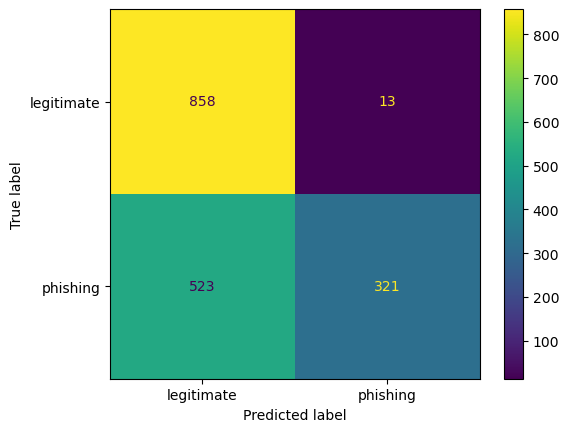

In [212]:
cm = confusion_matrix(y_test, pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
display_cm.plot()
plt.show()

In [247]:
import os


home_dir = os.path.expanduser('~')
models_dir = os.path.join(home_dir, 'models')
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

filename = os.path.join(models_dir, 'saved_model_features.sav')
